In [212]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<font size="5" color="red">ch11 데이터 프레임과 시리즈(Pandas)</font>
pip install pandas / conda install padas (아나콘다 프롬프트)

# 1절. 판다스 패키지
- 데이터 분석을 위해 반드시 알아야 할 패키지. 넘파이 기반으로 많은 라이브러리와 잘 통합되도록 설계
- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터프레임을 제공
- 판다스 장점 : 파일 io, 부분 데이터 추출, 크기변경, 데이터 분할, 병합, 정렬, 결측치 처리, 데이터분할, 피벗과 언피벗에용이
- [pandas api reference]

In [2]:
import pandas as pd
pd.__version__

'1.5.3'

In [135]:
data = pd.read_csv('data/ch09_member4.csv')
display(data)
type(data)

,name,age,email,address
0,홍길동,22,a@a.com,신림동
1,신길동,32,a@a.com,신림동
2,김길동,42,a@a.com,신림동


pandas.core.frame.DataFrame

In [136]:
data = pd.read_csv('data/ch09_member4.csv', 
                   header=None,
                   names=['name','member age', 'email', 'address'])
data.head(2)

,name,member age,email,address
0,name,age,email,address
1,홍길동,22,a@a.com,신림동


In [137]:
data = pd.read_json('data/ch09_member.json')   # 기본값이 utf-8로 되어있다
data

,name,age,email,address
0,홍길동,20,kildong@hong.com,서울시 관악구
1,신길동,30,shinkil@hong.com,서울시 동작구


In [138]:
iris = pd.read_hdf('data/ch09_iris.hdf5', key='iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 2절. 데이터 프레임 만들기
## 2.1 딕셔너리를 이용해서 데이터프레임 

In [139]:
d = {'kor':[100,90], 'mat' :[95,99]}
df = pd.DataFrame(data=d)
df

,kor,mat
0,100,95
1,90,99


In [140]:
df.to_dict() # 데이터 프레임을 딕셔너리로 변환

{'kor': {0: 100, 1: 90}, 'mat': {0: 95, 1: 99}}

In [141]:
df.to_numpy()

array([[100,  95],
       [ 90,  99]], dtype=int64)

In [142]:
# 딕셔너리 리스트를 데이터 프레임
d = [{'kor':100, 'mat':95},{'kor':90, 'mat':99}]
df = pd.DataFrame(data=d)
df

,kor,mat
0,100,95
1,90,99


In [143]:
df.dtypes

kor    int64
mat    int64
dtype: object

In [144]:
df.info()  # 이것을 많이 사용함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   kor     2 non-null      int64
 1   mat     2 non-null      int64
dtypes: int64(2)
memory usage: 160.0 bytes


In [145]:
d = [{'kor':100, 'mat':100}, {'kor':91, 'mat':91}, {'kor':93}]
df = pd.DataFrame(data=d) # 결측치는 실수형(float64). 정수형변환 불가(결츨치대체를 한후 정수형변환)
df  

,kor,mat
0,100,100.0
1,91,91.0
2,93,NaN


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     3 non-null      int64  
 1   mat     2 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 176.0 bytes


## 2.2 리스트를 이용해서 데이터 프레임 만들기

In [147]:
title = ['책1','책2','책3']
price = [15000, 18000, 10000]
df = pd.DataFrame(data={'title':title, 'price':price})
df

,title,price
0,책1,15000
1,책2,18000
2,책3,10000


In [148]:
import numpy as np
np.c_[title, price]

array([['책1', '15000'],
       ['책2', '18000'],
       ['책3', '10000']], dtype='<U11')

In [149]:
l = [['책1', 15000],
     ['책2', 18000],
     ['책3', 10000]]
df = pd.DataFrame(l)
df

,0,1
0,책1,15000
1,책2,18000
2,책3,10000


In [150]:
import numpy as np
np.c_[title, price]

array([['책1', '15000'],
       ['책2', '18000'],
       ['책3', '10000']], dtype='<U11')

## 2.3 read_csv

In [151]:
%ls C:\Ai_x\download\소상공인시장진흥공단_상가(상권)정보_20250331

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3664-591E

 C:\Ai_x\download\소상공인시장진흥공단_상가(상권)정보_20250331 디렉터리

2025-04-28  오후 03:51    <DIR>          .
2025-04-28  오후 03:51    <DIR>          ..
2025-04-21  오후 03:13             1,011 [필독]파일열람방법.txt
2025-04-21  오후 03:21        61,227,944 소상공인시장진흥공단_상가(상권)정보_강원_202503.csv
2025-04-21  오후 03:21       356,572,082 소상공인시장진흥공단_상가(상권)정보_경기_202503.csv
2025-04-21  오후 03:22        93,472,559 소상공인시장진흥공단_상가(상권)정보_경남_202503.csv
2025-04-21  오후 03:22        76,425,275 소상공인시장진흥공단_상가(상권)정보_경북_202503.csv
2025-04-21  오후 03:22        40,070,868 소상공인시장진흥공단_상가(상권)정보_광주_202503.csv
2025-04-21  오후 03:22        61,715,005 소상공인시장진흥공단_상가(상권)정보_대구_202503.csv
2025-04-21  오후 03:23        41,491,092 소상공인시장진흥공단_상가(상권)정보_대전_202503.csv
2025-04-21  오후 03:23        84,550,600 소상공인시장진흥공단_상가(상권)정보_부산_202503.csv
2025-04-21  오후 03:23       294,549,483 소상공인시장진흥공단_상가(상권)정보_서울_202503.csv
2025-04-21  오후 03:23         9,303,432 소상공인시장진흥공단_상가(상권)정보_세종_202503.csv
2025-04-21  오후 03:23        28,457

In [152]:
df = pd.read_csv(r'C:\Ai_x\download\소상공인시장진흥공단_상가(상권)정보_20250331\소상공인시장진흥공단_상가(상권)정보_세종_202503.csv',
                low_memory=False,
                nrows=30 # 처음 30행만
                )
df.shape

(30, 39)

In [153]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700019175,세종수이비인후과의원,NaN,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,일반의원,36,세종특별자치시,36110,세종특별자치시,36110525,해밀동,3611011600,해밀동,3611011600200050002,2,산,5,2.0,세종특별자치시 세종특별자치시 해밀동 산5-2,361103352828,세종특별자치시 세종특별자치시 해밀3로,43,NaN,3611011600200050002000001,행정중심복합도시,세종특별자치시 세종특별자치시 해밀3로 43,NaN,30092,NaN,NaN,NaN,127.264487,36.528585


In [154]:
# 판다스 디스플레이 옵션
pd.options.display.max_columns = 39  # 기본값:20, 39열까지 display 가능(기본값 20)
pd.options.display.max_rows = 40 # 40행까지 display가능(기본값 60)
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700019175,세종수이비인후과의원,NaN,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,일반의원,36,세종특별자치시,36110,세종특별자치시,36110525,해밀동,3611011600,해밀동,3611011600200050002,2,산,5,2.0,세종특별자치시 세종특별자치시 해밀동 산5-2,361103352828,세종특별자치시 세종특별자치시 해밀3로,43,NaN,3611011600200050002000001,행정중심복합도시,세종특별자치시 세종특별자치시 해밀3로 43,NaN,30092,NaN,NaN,NaN,127.264487,36.528585


In [155]:
df.head(1).T

,0
상가업소번호,MA010120220700019175
상호명,세종수이비인후과의원
지점명,NaN
상권업종대분류코드,Q1
상권업종대분류명,보건의료
상권업종중분류코드,Q102
상권업종중분류명,의원
상권업종소분류코드,Q10201
상권업종소분류명,내과/소아과 의원
표준산업분류코드,Q86201


In [156]:
# (1) csv 파일 불러오기(기본값)
# encoding=utf-8, sep=',', csv 첫번째 줄을 header, # 이 있는 줄도 데이터로 인식
member = pd.read_csv('data/ch11_member.csv')
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01


In [157]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int64 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int64(1), object(4)
memory usage: 368.0+ bytes


In [158]:
# 형변환 Age열 : int64 -> int16
member['Age'] = member['Age'].astype(np.int16)  #()안데 'int' 가 들어갈 경우 np.int32와 동일하다
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int16 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int16(1), object(4)
memory usage: 332.0+ bytes


In [159]:
# 형변환 Birth열 : object(문자) -> datetime64
member['Birth_as'] = member['Birth'].astype('datetime64')
member.info

<bound method DataFrame.info of    Name  Age          Email  Address       Birth   Birth_as
0   홍길동   20  hong@hong.com  서울시 강동구  1999-01-01 1999-01-01
1   홍길서   30   seo@hong.com   서울시 중구  1999-12-01 1999-12-01
2   홍길남   21   nam@hong.com  서울시 강동구  1999-11-01 1999-11-01
3   홍길북   22   buk@hong.com  서울시 관악구  1999-05-01 1999-05-01
4   홍길중   23   mid@hong.com   부산시 중구  1999-01-30 1999-01-30
5  #홍길뜽   24    non@not.com      없는구  2000-01-01 2000-01-01>

In [160]:
member['Birth_to'] = pd.to_datetime(member['Birth'])  # astype()함수보다 안전한 형변환
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      6 non-null      object        
 1   Age       6 non-null      int16         
 2   Email     6 non-null      object        
 3   Address   6 non-null      object        
 4   Birth     6 non-null      object        
 5   Birth_as  6 non-null      datetime64[ns]
 6   Birth_to  6 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int16(1), object(4)
memory usage: 428.0+ bytes


In [161]:
# (2) 특정행 제외하고 csv 파일 읽기
member = pd.read_csv('data/ch11_membercp949.csv', 
                     encoding='cp949',
                     skiprows=[1,6])   # 1번째, 6번째 행은 제외하고 읽어오기
member

,Name,Age,Email,Address,Birth
0,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
1,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
2,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
3,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [162]:
# (3) 주석(#)제외, datetime형 필드 지정하여 읽기
member = pd.read_csv('data/ch11_membertab.csv',
                     sep = '\t',
                     comment='#',
                     parse_dates=['Birth'])  # datetime 형으로 읽어올 필드 지정
member


,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [163]:
# (4) sep = '|', 상위5항만 읽어오기
member = pd.read_csv('data/ch11_membersep.csv',
                       sep = '|',
                       nrows=5)
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 2.4 패키지에서 가져오기 : IRIS 데이터
### iris 가져오기 방법1: sklearn (머신러닝 패키지)
### iris 가져오기 방법2: statsmodels(R 데이터)
### iris 가져오기 방법3: seaborn(시각화 패키지)

In [164]:
from sklearn import datasets
# sklearn : 머신러닝패키지(전처리함수, 머신러닝, 성능평가를 위한 함수, 학습데이터셋)
iris = datasets.load_iris()
iris.keys() # 딕셔너리 형태

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [165]:
print(iris.DESCR) # iris데이터 셋에 대한 설명

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [166]:
iris.data # 독립변수
iris['data'][:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [167]:
iris.feature_names    # 독립변수의 열이름
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [168]:
# 데이터 프레임에서 열이름
columns = [col[:-5].replace(' ','_') for col in iris.feature_names]+['species']
columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [169]:
iris.target
iris['target'] # 머신러닝시 종속변수

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [170]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [171]:
iris.target_names[[0,0,0,0,0,1,1,1,1]]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'versicolor'], dtype='<U10')

In [172]:
iris.target_names[iris.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [173]:
# 독립변수
data = iris.data
# 종속변수
target = iris.target_names[iris.target]
data.shape, target.shape  # 독립변수와 종속변수의 차원

((150, 4), (150,))

In [174]:
# 독립변수와 종속변수를 stack한 후 데이터 프레임으로
pd.DataFrame(data = np.hstack((data, target.reshape(-1,1))),
                             columns = columns)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## iris 가져오기  방법2 : statsmodels (R 데이터)

In [175]:
# R언어에 있는 유명한 데어터셋을 가져오는 함수
from statsmodels.datasets import get_rdataset
iris_dataset = get_rdataset('iris',
                           package = 'datasets', # R의 datasets 패키지에서 가져오고,
                           cache = True) # 한번 다운로드한 데이터셋을 pc저장
iris_dataset

<class 'statsmodels.datasets.utils.Dataset'>

In [176]:
iris = iris_dataset.data
iris.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [177]:
iris['Sepal.Length']
# iris.Sepal.Length 열 이름에 '.', ''이 있으면 irris.Sepal.Length 접근 불가

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 150, dtype: float64

In [178]:
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris.columns
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


### iris 가져오는 방법3 : seaborn(시각화 패키지)

In [179]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [180]:
# 데이터 프레임을 csv파일로
iris.to_csv('data/ch11_iris.csv',
           # sep = ',', endcoding = 'utf-8' 이건 기본값이다
           index=False) # 행이름을 제외하고 파일 출력

In [181]:
import pandas as pd
load_iris = pd.read_csv('data/ch11_iris.csv')
load_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [182]:
# 데이터 프레임을 압축파일(.zip, .gz, bz2)로
iris.to_csv('data/ch11_iris.gz',index=False,
             compression = 'infer')

In [183]:
load_iris = pd.read_csv('data/ch11_iris.gz', compression = 'infer')
load_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 3절. 이름(열, 행) 지정하기
##  3.1 열이름 지정하기

In [184]:
member = pd.read_csv('data/ch11_member.csv',
                    comment='#',
                    parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [185]:
member.columns = ['이름', '나이', '메일', '주소','생년월일']
member.columns.name = None
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 3.2 행이름 지정

In [186]:
member.index

RangeIndex(start=0, stop=5, step=1)

In [187]:
member.index = range(11,16)
member

,이름,나이,메일,주소,생년월일
11,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
12,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
13,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
14,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
15,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [188]:
member.index = ['동','서','남','북','중']
member

,이름,나이,메일,주소,생년월일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [189]:
member.index.name = None
print(member.index.name)

None


In [190]:
member.loc['남','이름'] # loc를 이용해서 행이름과 열이름으로 데이터 부분 조회

'홍길남'

In [191]:
# 특정을 index 로 setting
# member를 수정하려면 (1)할당 (2)inplace 매개변수에 True(기본값은 False)
member1 = member.set_index('이름')
member1
 # member.set_index('이름') # 이름열이 index로 setting 

,나이,메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [192]:
member.set_index('이름', inplace = True)

In [193]:
member.head(1)

,나이,메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [194]:
member.reset_index()

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [195]:
member.reset_index(inplace=True) # index를 컬럼로

In [196]:
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [197]:
member.loc[1, '생년월일']

Timestamp('1999-12-01 00:00:00')

In [198]:
# 시리즈(날짜형).dt : datetime 열의 날짜 및 시간에 관련된 정보만 추출
member['생년월일'].dt.year

0    1999
1    1999
2    1999
3    1999
4    1999
Name: 생년월일, dtype: int64

In [199]:
member['생년월일'].dt.weekday #0:월, 1:화 ....5:토

0    4
1    2
2    0
3    5
4    5
Name: 생년월일, dtype: int64

## 3.2 행이름 지정하기

In [200]:
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [201]:
member.columns = [['기본정보','기본정보','기본정보','추가정보','추가정보'],
                  ['이름','나이','메일','주소','생년월일']]
member.columns.names = ['대분류','소분류']
member

대분류 기본정보                        추가정보           
소분류   이름  나이             메일       주소       생년월일
0    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
1    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
2    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
3    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
4    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [202]:
member.index = [['좌우','좌우','상하','상하','상하'],
                ['동','서','남','북','중']]
member.index.names = ['레벨1','레벨2']
member

대분류     기본정보                        추가정보           
소분류       이름  나이             메일       주소       생년월일
레벨1 레벨2                                            
좌우  동    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
    서    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
상하  남    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
    북    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
    중    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [203]:
member.head(1)

대분류     기본정보                        추가정보           
소분류       이름  나이             메일       주소       생년월일
레벨1 레벨2                                            
좌우  동    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01

In [204]:
member.loc[('좌우','동'),'기본정보']

소분류
이름              홍길동
나이               20
메일    hong@hong.com
Name: (좌우, 동), dtype: object

## 4절. 부분데이터 조회

In [205]:
member = pd.read_csv('data/ch11_member.csv',comment = '#', parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 4.1 열 조회

In [206]:
member['Name']
member.Name

0    홍길동
1    홍길서
2    홍길남
3    홍길북
4    홍길중
Name: Name, dtype: object

In [207]:
member[['Name','Email']]

,Name,Email
0,홍길동,hong@hong.com
1,홍길서,seo@hong.com
2,홍길남,nam@hong.com
3,홍길북,buk@hong.com
4,홍길중,mid@hong.com


In [208]:
# member[0] 행을 조회할 경우 loc, iloc. []안에는 열이름이나 조건만 사용가능

## 4.2 loc을 이용한 조회
- df.loc[행이름, 열이름] : 행이름과 열이름으로 조회
   * 행이름과 열이름 자리에 list ex.['Name','Email']
   * 행이름과 열이름 자리에 슬라이싱 from:to: from부터 to까지
   * , 열이름 생략시 모든 열

In [209]:
# member 0행부터 2행
member.loc[0:2, ]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [210]:
member.index = ['동', '서', '남', '북', '중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [211]:
member.loc['동':'남']

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [212]:
# member 동행부터 남행, 'Name', 'Age', 'Email'
member.loc['동':'남', 'Name':'Email']

,Name,Age,Email
동,홍길동,20,hong@hong.com
서,홍길서,30,seo@hong.com
남,홍길남,21,nam@hong.com


In [213]:
# member 동행부터 남행, 'Name','Email','Address'
member.loc[['동','남'],['Name','Email','Address']]

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [214]:
# loc를 이용한 특정 열 조회
member.loc[:,['Name','Address']] # member['Name','Address'] 동일

,Name,Address
동,홍길동,서울시 강동구
서,홍길서,서울시 중구
남,홍길남,서울시 강동구
북,홍길북,서울시 관악구
중,홍길중,부산시 중구


In [215]:
member.loc['동']  # 특정행이나 특정열만 access => 결과가 시리즈

Name                       홍길동
Age                         20
Email            hong@hong.com
Address                서울시 강동구
Birth      1999-01-01 00:00:00
Name: 동, dtype: object

In [216]:
member.loc['동'] # 결과가 1차원 : 시리즈

Name                       홍길동
Age                         20
Email            hong@hong.com
Address                서울시 강동구
Birth      1999-01-01 00:00:00
Name: 동, dtype: object

In [217]:
member.loc['동':'동'] # 슬라이싱의 경우 결과가 2차원 => 데이터프레임

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


## 4.3 iloc을 이용한 조회
- df.iloc[행이름, 열이름] : 행이름과 열이름으로 조회
   * 행이름과 열이름 자리에 list ex.['Name','Email']
   * 행이름과 열이름 자리에 슬라이싱 from:to: from부터 to까지
   * , 열이름 생략시 모든 열

In [218]:
# 0번째 ~ 2번째 행 모든 열
member.loc['동':'남']
member.iloc[0:3] # 열번호 생략시 모든 열

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [219]:
member.iloc[0:1]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [220]:
member.iloc[0] # 결과가 1차원이면 시리즈. 데이터프레임으로 하자고 하면 슬라이싱 이용하거나 
             # pd.DataFrame()함수 이용

Name                       홍길동
Age                         20
Email            hong@hong.com
Address                서울시 강동구
Birth      1999-01-01 00:00:00
Name: 동, dtype: object

In [221]:
# 짝수번째 행의 맨 마지막 열을 제외한 데이터 추출
member.iloc[::2, :-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
남,홍길남,21,nam@hong.com,서울시 강동구
중,홍길중,23,mid@hong.com,부산시 중구


In [222]:
# 모든행의 마지막 열만 데이터프레임으로 추출
member.iloc[:, -1]

동   1999-01-01
서   1999-12-01
남   1999-11-01
북   1999-05-01
중   1999-01-30
Name: Birth, dtype: datetime64[ns]

In [223]:
# 0번째, 3번째행 0번째, 3번째, 4번째 열
member.iloc[0:4:3,[0,3,4]]

,Name,Address,Birth
동,홍길동,서울시 강동구,1999-01-01
북,홍길북,서울시 관악구,1999-05-01


## 4.4 조건으로 조회
- df[조건] : 조건에 맞는 행(모든 열)
- df.loc[조건, 열이름] 또는 df[조건][열이름] : 조건에 맞는 행의 특정 열

In [224]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [225]:
member.Age > 22

동    False
서     True
남    False
북    False
중     True
Name: Age, dtype: bool

In [226]:
# Age 가 22 보다 큰 데이터 셋
member[member.Age>22]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [227]:
# Age 가 22보다 큰 데이터의 Name 과 Age
member[member.Age>22][['Name','Age']]   # member[member.Age>22]['Name':'Age'] 안됨

,Name,Age
서,홍길서,30
중,홍길중,23


In [228]:
member.loc[member.Age>22, ['Name','Age']]

,Name,Age
서,홍길서,30
중,홍길중,23


In [229]:
address1 = '서울시 강동구'
address2 = '부산시 중구'
print(address1.startswith('서울시'))
print(address2.startswith('서울시'))
print(address1.find('강동구')!=-1)
print(address1.find('강동구')>0)


True
False
True
True


In [230]:
member.Address.str.startswith('서울시')

동     True
서     True
남     True
북     True
중    False
Name: Address, dtype: bool

In [231]:
# Address가 '서울시'로 시작하는 행
member[member.Address.str.startswith('서울시')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [232]:
# Address에 '강동구' 가 포함된 행
member[member.Address.str.count('강동구')>0]
member[member.Address.str.find('강동구')!=-1]
member[member.Address.str.contains('강동구')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [233]:
# Address에 '강동구'가 포함된 'Name', 'Age' 열 조회
member[member.Address.str.contains('강동구')][['Name','Age']]
member.loc[member.Address.str.contains('강동구'),'Name':'Age']



,Name,Age
동,홍길동,20
남,홍길남,21


In [234]:
# 1999년도 태어난 데이터
member[member.Birth.dt.year==1999]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [235]:
member[member.Birth.dt.year<2000]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## ※ 데이터 프레임의 부분 데이터 조회 방법

df[열이름] - 특정 열 모든 행조회
df[조건] - 조건에 맞는 모든 행 조회
df.loc[행이름, 열이름] : 이름조회, 조건(행이름 자리)으로 조회 가능
열이름을 생략하면 모든 열
행이름, 열이름 자리에 list, 슬라이싱
df.iloc[행번호, 열번호] : 번호 조회
열번호를 생략하면 모든 열
행번호, 열번호 자리에 list, 슬라이싱

In [236]:
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)

# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)

# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)

# 6. species가 versicolor인 데이터의 모든 열

# 7. species가 setosa인 데이터 최초 5개 행만 출력

# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력

# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'

# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열

In [237]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [238]:
#1
iris['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [239]:
# 2
iris.iloc[0:11, :-1],
iris.loc[0:10, iris.columns[:-1]]



,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [240]:
#3
iris.iloc[0:11, :-1:2]
iris.loc[0:10, iris.columns[:-1][::2]]


,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5


In [241]:
#4 
iris.iloc[::50, :]
iris.loc[[0,50,100]]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [242]:
#5
iris.iloc[::25, [2, 3]]
iris.loc[::25, ['petal_length', 'petal_width']]



,petal_length,petal_width
0,1.4,0.2
25,1.6,0.2
50,4.7,1.4
75,4.4,1.4
100,6.0,2.5
125,6.0,1.8


In [243]:
#6
iris.loc[iris.species.str.contains('versicolor')]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [244]:
#7
iris.loc[iris.species.str.contains('setosa')][0:6]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [245]:
#8
iris[iris['sepal_length'] > 6.5][0:5]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor


In [246]:
#9
(iris[iris['sepal_length'] > 7.2])[['sepal_length', 'sepal_width', 'petal_length']]

,sepal_length,sepal_width,petal_length
105,7.6,3.0,6.6
107,7.3,2.9,6.3
117,7.7,3.8,6.7
118,7.7,2.6,6.9
122,7.7,2.8,6.7
130,7.4,2.8,6.1
131,7.9,3.8,6.4
135,7.7,3.0,6.1


In [247]:
#10
iris.loc[(iris.species.str.contains('versicolor')) & (iris['sepal_length'] > 6.5)]

import numpy as np
iris[np.logical_and(iris.species=='versicolor',
              iris.sepal_length>6.5)]

         

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [248]:
 1. sepal_length 열만 출력
iris['sepal_length'], iris.sepal_length

# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
iris.loc[:10, 'sepal_length':'petal_width']
iris.iloc[:11, :-1]

# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
iris.loc[3:10, ['sepal_length','petal_length'] ]  
iris.iloc[3:11, [0,2] ]  

# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.loc[[0,50,100]]
iris.loc[:100:50] # 비추
iris.iloc[:101:50]

# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
iris.loc[[0,25,50,75,100,125], 'petal_length':'petal_width']
iris.loc[::25, 'petal_length':'petal_width'] # 비추
iris.iloc[::25, 2:-1]

# 6. species가 versicolor인 데이터의 모든 열
iris[iris.species!='versicolor']  이거는 아닐때

# 7. species가 setosa인 데이터 최초 5개 행만 출력
iris[iris.species=='setosa'].head()
iris[iris.species=='setosa'].iloc[:5]

# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
iris[iris.sepal_length>=6.5].head()
iris[iris.sepal_length>=6.5].iloc[:5]

# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
iris.loc[iris.sepal_length >= 7.2, 'sepal_length':'petal_length']
iris[iris.sepal_length >= 7.2][['sepal_length','sepal_width','petal_length']]

# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
iris[ (iris.species=='versicolor') & (iris.sepal_length>6.5)]

SyntaxError: invalid syntax (622329472.py, line 1)

In [249]:
import numpy as np
np.logical_and(True, True)

True

# 5절. 데이터 추가 및 삭제
## 5.1 데이터 프레임의 요소 삭제
- df.drop(행 이름이나 열 이름, axis) : axis = 0 : 행삭제 / axis=1 : 열삭제

In [250]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [251]:
# (1) 단일 행 삭제
member.drop('중') # axis = 0이 기본값

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [252]:
# '동'행이 없으면 에러
member.drop('동', inplace=True)

In [253]:
# (2) 복수행 삭제
member.drop['동','서']

TypeError: 'method' object is not subscriptable

In [254]:
# (3) 열 삭제
member.drop(labels=['Age','Birth'], axis = 1)

,Name,Email,Address
서,홍길서,seo@hong.com,서울시 중구
남,홍길남,nam@hong.com,서울시 강동구
북,홍길북,buk@hong.com,서울시 관악구
중,홍길중,mid@hong.com,부산시 중구


## 5.2 데이터 프레임의 요소 추가

In [255]:
member

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [256]:
# 1. 공통값으로 추가
member['favorite_no'] = 7
member

,Name,Age,Email,Address,Birth,favorite_no
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,7
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,7


In [257]:
# 2. 리스트로 추가
member['fn'] = [7,7,7,None]
member

,Name,Age,Email,Address,Birth,favorite_no,fn
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7,7.0
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,7,7.0
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,7,NaN


In [258]:
import math
np.nan, None, math.nan # 결측치

(nan, None, nan)

In [259]:
# 3. 데이터프레임에 시리즈로 추가
member = pd.read_csv('data/ch11_member.csv', comment ='#' )
member['fn2'] = pd.Series([7,7]), index=['동','서','남']
member

SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (426579686.py, line 3)

In [260]:
pd.Series([7,7,7], index=[0,2,3])

0    7
2    7
3    7
dtype: int64

In [261]:
pd.Series([7,7,7], index=['name','age','no'])

name    7
age     7
no      7
dtype: int64

In [262]:
member['fn'] = pd.Series(['test', 'test1','test2'], index=[0,3,4])
member

,Name,Age,Email,Address,Birth,favorite_no,fn
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7,NaN
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7,NaN
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,7,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,7,NaN


In [263]:
# 행 추가 : 추가할 데이ㅓ를 데이터프레임 -> 기존DF, 추가할 DF 연결
new_member = pd.read_csv('data/ch11_member.csv')
new_member = pd.DataFrame([{
    'Name' : '홍길술',
    'Age' : 30,
    'Email' : 'h@h.com',
    'Address' : '설',
    'Birth' : '2010-01-01'
}])
new_member

,Name,Age,Email,Address,Birth
0,홍길술,30,h@h.com,설,2010-01-01


In [264]:
# 행 추가시 member 와 new_member 연결
member = pd.concat([member, new_member])
member

,Name,Age,Email,Address,Birth,favorite_no,fn
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01 00:00:00,7.0,NaN
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01 00:00:00,7.0,NaN
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01 00:00:00,7.0,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30 00:00:00,7.0,NaN
0,홍길술,30,h@h.com,설,2010-01-01,NaN,NaN


In [265]:
pd.concat([member, new_member], axis=1 ) # axix = 0 기본값 (행연결)
                                         # axis = 1 열연결

,Name,Age,Email,Address,Birth,favorite_no,fn,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01 00:00:00,7.0,NaN,NaN,NaN,NaN,NaN,NaN
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01 00:00:00,7.0,NaN,NaN,NaN,NaN,NaN,NaN
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01 00:00:00,7.0,NaN,NaN,NaN,NaN,NaN,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30 00:00:00,7.0,NaN,NaN,NaN,NaN,NaN,NaN
0,홍길술,30,h@h.com,설,2010-01-01,NaN,NaN,홍길술,30.0,h@h.com,설,2010-01-01


In [266]:
# 행 추가 : 추가할 데이터를 시리즈

In [267]:
# 인덱스 재조정
#member.index = range(len(member))
#member
member.reset_index(drop=True) # 기존의 index 를 drop 하고 새로 연속된 index로 재조정
member

,Name,Age,Email,Address,Birth,favorite_no,fn
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01 00:00:00,7.0,NaN
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01 00:00:00,7.0,NaN
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01 00:00:00,7.0,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30 00:00:00,7.0,NaN
0,홍길술,30,h@h.com,설,2010-01-01,NaN,NaN


# 6절. 병합과 연결
##  6.1merge()를 이용한 병합

In [268]:
df1 = pd.DataFrame({'key':['a','b','c','d'],
                     'c1':[1,2,3,4]})
df2 = pd.DataFrame({'key':['a','b','c','e'],
                     'c2':[5,6,7,8]})

In [269]:
df1.merge(right=df2) # how = 'inner' : 양쪽 다 일치하는 데이터만 남김

,key,c1,c2
0,a,1,5
1,b,2,6
2,c,3,7


In [270]:
df1.merge(right=df2, how = 'left') # 왼쪽 데이터만 남기고 right에 매칭되는 것만 병합

,key,c1,c2
0,a,1,5.0
1,b,2,6.0
2,c,3,7.0
3,d,4,NaN


In [271]:
df1.merge(right=df2, how = 'right') # 오른쪽 데이터만 남기고 왼쪽 데이터에 매칭되는 것만 병함

,key,c1,c2
0,a,1.0,5
1,b,2.0,6
2,c,3.0,7
3,e,NaN,8


In [272]:
df1.merge(df2, how='outer') # 양쪽 모두 다 남김

,key,c1,c2
0,a,1.0,5.0
1,b,2.0,6.0
2,c,3.0,7.0
3,d,4.0,NaN
4,e,NaN,8.0


In [273]:
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                     'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key4':['a','b','c','e'],
                     'c2':[5,6,7,8]})
display(df3)
display(df4)

,key3,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key4,c2
0,a,5
1,b,6
2,c,7
3,e,8


In [274]:
df3.merge(right=df4, left_on='key3', right_on='key4', how='inner')

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7


In [275]:
df3.merge(right=df4, left_on='key3', right_on='key4', how='outer')

,key3,c1,key4,c2
0,a,1.0,a,5.0
1,b,2.0,b,6.0
2,c,3.0,c,7.0
3,d,4.0,NaN,NaN
4,NaN,NaN,e,8.0


In [276]:
df3.merge(df4, left_index=True, right_index=True) # pd.concat([df3, df4],1) 와 유사

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7
3,d,4,e,8


## 6.2 concat()을 이용한 연결
- pd.concat([df1, df2], axis)
     * axis =0(기본값) : 위아래로 연결
     * axis =1 : 좌우로 연결

In [277]:
df1 = pd.DataFrame({'key':['a','b','c','d'],
                    'c1':[1, 2, 3, 4]})
df2 = pd.DataFrame({'key':['a','b','c','e'],
                    'c1':[5,6,7,8]})
pd.concat( [df1, df2], axis=0 ).reset_index(drop=True) 

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4
4,a,5
5,b,6
6,c,7
7,e,8


In [278]:
df3 = pd.DataFrame({'key3':['a','b','c','d'],
                     'c1':[1,2,3,4]})
df4 = pd.DataFrame({'key4':['a','b','c','e'],
                     'c2':[5,6,7,8]})
display(df3)
display(df4)

,key3,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key4,c2
0,a,5
1,b,6
2,c,7
3,e,8


# 7절 정렬(행이름, 열이름, 값에 의한 정렬)
'100' < '9'
- df.sort_index(axis) : 행(axis=0) 또는 열(axis=1) 이름으로 정렬
- df.sort_vlaue(by=정렬기준이 될 열이름, acending = T/F, inplace=T/F) : 값에 의한 정렬

In [280]:
member

,Name,Age,Email,Address,Birth,favorite_no,fn
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01 00:00:00,7.0,NaN
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01 00:00:00,7.0,NaN
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01 00:00:00,7.0,NaN
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30 00:00:00,7.0,NaN
0,홍길술,30,h@h.com,설,2010-01-01,NaN,NaN


In [283]:
member = pd.read_csv('data/ch11_member.csv', comment='#')
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.1 행이름으로 정렬

In [285]:
member.sort_index(axis=0)
member.sort_index(axis='rows', inplace=True)  # ascending=True 기본값(오름차순) 
member

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [287]:
member.sort_index(axis=1)
member.sort_index(axis='columns', inplace=True)  
member

,Address,Age,Birth,Email,Name
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중


## 7.2 열이름으로 정렬

In [311]:
member.sort_index(axis=1)
member.sort_index(axis='columns', inplace=True) # ascending=True 기본값
member

,Address,Age,Birth,Email,Name
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


## 7.3 값에 의한 정렬

In [290]:
member.sort_values(by='Age')  # Age 기준으로 오름차순 정렬(ascend:True)

,Address,Age,Birth,Email,Name
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [293]:
member.sort_values(by='Age', ascending = False)  # Age 기준으로 내림차순 정리
member

,Address,Age,Birth,Email,Name
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중


In [296]:
# Adress 기준으로 정렬, 동일하면 Age
member.sort_values(by=['Address','Age'], ascending = False)

,Address,Age,Birth,Email,Name
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중


In [300]:
member.sort_values(by=['Address','Age'],
                   ascending=[True, False], inplace=True)
member

,Address,Age,Birth,Email,Name
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [306]:
from seaborn import load_dataset
iris = load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [307]:
# iris 데이터 
# (1) sepal_length 값 기준으로 같으면 sepal_width 내림차순
# (2) index (행) 기준으로 정렬
# (3) 열이름 기준으로 (column)기준으로 정렬한 내용을 출력(iris에서는 적용x)

In [308]:
iris.sort_values(by=['sepal_length','sepal_width'],
                   ascending=[True, False], inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
...,...,...,...,...,...
117,7.7,3.8,6.7,2.2,virginica
135,7.7,3.0,6.1,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
118,7.7,2.6,6.9,2.3,virginica


In [309]:
iris.sort_index(axis=0)
iris.sort_index(axis='rows', inplace=True)  # ascending=True 기본값(오름차순) 
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [310]:
iris.sort_index(axis=1)
iris.sort_index(axis='columns', inplace=False)  # ascending=True 기본값(오름차순) 
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 8절. 기초 통계 분석
    * 판다스 : 기초통계 / statsmodels : 난이도 있는 통계
- count : NaN을 제외한 갯수
- min
- max
- sum
- cumsum : 누적합
- cumprod : 누적곱
- mean
- rolling(n).mean() : 데이터 변동(노이즈)가 다소 있을 때, 추세(패턴)을 부드럽게 보고 싶을 때
- median : 중위수
- var : 분산
- std : 표준편차
- median : 중위수(50% 지점)
- quantile : 분위수 - 0사분위수, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 4사분위수(100%)
      IQR = Q3 - Q1
      Q1 - 1.5*IQR ~ Q3+1.5*IQR 이외의 값은 이상치
      max
      Q3
      Q2
      Q1
      min
- describe : 요약통계량
- corr : 상관관계(계수)

In [12]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [13]:
iris.columns = [col.lower().replace('.','_') for col in iris.columns]
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## 8.1 min,max,mean,std...

In [16]:
iris.min(axis=0)   # 열별 최소값(문자필드는 코드값이 작은것)

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [19]:
iris.median(axis=0, numeric_only=True) # 행들의 중수(열별중위수)
# 평균, 주우이수, 표준편차, 분산 .... 숫자필드
# numeric_only=True : numeric만 적용

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [21]:
X = iris.iloc[:,:-1]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
X.std(axis=0)

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [23]:
X.mean(axis=1)

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

In [29]:
# qunatile : 데이터프레임이나 시리즈에서 사분위수
# interplation = 'nearest' : 정확한 구간의 값이 없을 경우 가까운 데이터 출력
df = pd.DataFrame(data=[1,3,4,7,10], columns=['value'])
df['value'].quantile(q = [0,0.25,0.5,0.75,1], interpolation = 'nearest')

0.00     1.0
0.25     3.0
0.50     4.0
0.75     7.0
1.00    10.0
Name: value, dtype: float64

In [30]:
# interpolation = midpoint : 정확한 구간을 출력
df = pd.DataFrame(data=[1,3,4,7,10], columns=['value'])
df['value'].quantile(q = [0,0.25,0.5,0.75,1], interpolation = 'midpoint')

0.00     1.0
0.25     3.0
0.50     4.0
0.75     7.0
1.00    10.0
Name: value, dtype: float64

In [35]:
quant = X.quantile(q=[0,0.25,0.5,0.75,1])
quant

,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.00,0.1
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8
1.00,7.9,4.4,6.90,2.5


In [40]:
min = quant.iloc[0, 0]
max = quant.iloc[4, 0]
q1 = quant.iloc[1, 0]
q3 = quant.iloc[3, 0]
min < q1-1.5*(q3-q1), max > q3 + 1.5*(q3-q1)

(False, False)

In [42]:
X.count(axis=0)   # 결측치를 제외한 데이터 갯수

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
dtype: int64

In [43]:
X.rolling(5).sum().iloc[4:]

,sepal_length,sepal_width,petal_length,petal_width
4,24.3,16.4,7.0,1.0
5,24.6,16.8,7.3,1.2
6,24.3,17.2,7.3,1.3
7,24.6,17.4,7.5,1.3
8,24.4,17.2,7.4,1.3
...,...,...,...,...
145,32.9,15.3,27.0,11.3
146,32.3,14.7,26.9,10.9
147,33.0,15.0,27.0,11.0
148,32.4,15.2,26.5,11.0


## 8.2 요약 통계량

In [45]:
# 1) 기본 요약 통계량
iris.describe() # 숫자열과 문자열이 같이 있을 경우 : 숫자열만

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [48]:
 # 문자열에서의 요약통계량 : 데이터갯수(unique), 데이터종류, 최빈데이터(top), 최빈데이터 갯수
iris['species'].describe() 

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [51]:
# describe()의 include 와 exclude 매개변수
df = pd.DataFrame(data={'a':[1,2,3]*2,
                        'b' :[2.,1]*3,
                        'c' :['aaa']*5+['bbb'],
                        'd':[True, False]*3})
display(df)
df.info()

,a,b,c,d
0,1,2.0,aaa,True
1,2,1.0,aaa,False
2,3,2.0,aaa,True
3,1,1.0,aaa,False
4,2,2.0,aaa,True
5,3,1.0,bbb,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      float64
 2   c       6 non-null      object 
 3   d       6 non-null      bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 278.0+ bytes


In [52]:
df.describe(include=['float64','bool'])

,b,d
count,6.000000,6
unique,NaN,2
top,NaN,True
freq,NaN,3
mean,1.500000,NaN
std,0.547723,NaN
min,1.000000,NaN
25%,1.000000,NaN
50%,1.500000,NaN
75%,2.000000,NaN


In [53]:
df.describe(include='all')

,a,b,c,d
count,6.000000,6.000000,6,6
unique,NaN,NaN,2,2
top,NaN,NaN,aaa,True
freq,NaN,NaN,5,3
mean,2.000000,1.500000,NaN,NaN
std,0.894427,0.547723,NaN,NaN
min,1.000000,1.000000,NaN,NaN
25%,1.250000,1.000000,NaN,NaN
50%,2.000000,1.500000,NaN,NaN
75%,2.750000,2.000000,NaN,NaN


In [ ]:
df.describe(exclude=object) # object 형인 컬럼만 제외하고 기본 통계량

In [56]:
df['c'].unique() # 특정 컬럼의 고유 값들의 종류

array(['aaa', 'bbb'], dtype=object)

In [59]:
df['c'].value_counts()

aaa    5
bbb    1
Name: c, dtype: int64

In [61]:
df.select_dtypes(include=object) # object형 컬럼만 추출

,c
0,aaa
1,aaa
2,aaa
3,aaa
4,aaa
5,bbb


## 8.3 공분산, 상관계수

In [62]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [64]:
X = iris.iloc[:,:-1]
X.cov() # 공분산

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [65]:
X.corr() # 상관계수      :  -1과 1 사이

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

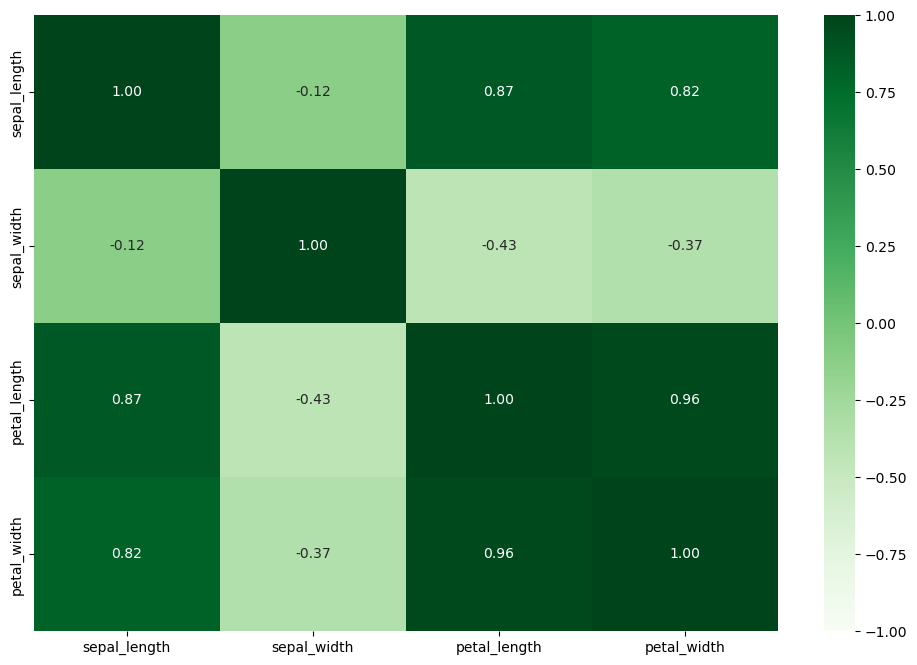

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='Greens')
plt.show

# 9절. 데이터 그룹화 및 집계

In [72]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.iloc[::25]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
25,5.0,3.0,1.6,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica
125,7.2,3.2,6.0,1.8,virginica


## Goupby
cf.pivot_table

In [84]:
# 1) 그룹화 방법1
#    df.groupby(by=[그루핑할열]).기초통계함수()
#          [함수적용해서 추력할 열들] 생략시 그룹핑할열을 제외한 모든 열 적용
iris_grouped = iris.groupby(iris.Species)
iris_grouped = iris.groupby(['Species'])
iris_grouped = iris.groupby('Species')
for group, data in iris_grouped:
    print(group)
    display(data.sample(2).sort_index())   #reset 등 사용할 수 있다

setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
4,5.0,3.6,1.4,0.2,setosa
27,5.2,3.5,1.5,0.2,setosa


versicolor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,7.0,3.2,4.7,1.4,versicolor
60,5.0,2.0,3.5,1.0,versicolor


virginica


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
144,6.7,3.3,5.7,2.5,virginica
147,6.5,3.0,5.2,2.0,virginica


In [75]:
iris.groupby(by='Species').sum()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [78]:
iris.groupby(by='Species').mean()[['Petal.Length','Petal.Width']]
iris.groupby(by='Species')[['Petal.Length','Petal.Width']].mean()

,Petal.Length,Petal.Width
Species,,
setosa,1.462,0.246
versicolor,4.260,1.326
virginica,5.552,2.026


In [85]:
iris_grouped_sum=iris.groupby('Species').median()
iris_grouped_sum.reset_index()

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,5.0,3.4,1.50,0.2
1,versicolor,5.9,2.8,4.35,1.3
2,virginica,6.5,3.0,5.55,2.0


In [87]:
iris_grouped_sum2 = iris.groupby('Species', as_index=False).sum()
iris_grouped_sum2

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


In [88]:
iris_grouped_sum2[(iris_grouped_sum2.Species=='setosa') |
                  (iris_grouped_sum2.Species=='versicolor')]

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3


In [89]:
# 2) 그룹화 방법2
#    df.pivot_talbe(index=[그룹핑할열],
#                   values=[함수적용해서 출력할 열들],
#                   aggfunc = 함수(기본값:mean))


In [94]:
iris.groupby('Species')['Petal.Length','Petal.Width'].mean()
iris.pivot_table(index = 'Species',
                  values=['Petal.Length','Petal.Width'],
                  aggfunc='mean')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13264\4156772674.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  iris.groupby('Species')['Petal.Length','Petal.Width'].mean()


,Petal.Length,Petal.Width
Species,,
setosa,1.462,0.246
versicolor,4.260,1.326
virginica,5.552,2.026


In [97]:
iris.groupby('Species').count() # 결측치를 제외한 값의 갯수
iris.pivot_table(index = 'Species',
                  values=['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'],
                  aggfunc='count')

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [98]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 다중열로 그룹화

In [100]:
# iris로 다중열로 그룹화하기 위해 데이터 컬럼 추가
iris.shape

(150, 5)

In [102]:
[[0]*25] + [[1]*25]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [103]:
import numpy as np
np.ravel([[i]*25 for i in range(6)])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [104]:
iris['num'] = np.ravel([[i]*25 for i in range(6)])
iris.iloc[::25]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
25,5.0,3.0,1.6,0.2,setosa,1
50,7.0,3.2,4.7,1.4,versicolor,2
75,6.6,3.0,4.4,1.4,versicolor,3
100,6.3,3.3,6.0,2.5,virginica,4
125,7.2,3.2,6.0,1.8,virginica,5


In [105]:
# 각열의 임의의 데이터에 결측치를 할당
#iris.iloc[0,0] = np.nan

In [111]:
import random
iris.iloc[random.sample(range(50),1), 0] = np.nan
iris.iloc[random.sample(range(50),2), 1] = np.nan
iris.iloc[random.sample(range(50),3), 2] = np.nan
iris.iloc[random.sample(range(50),4), 3] = np.nan

In [112]:
import random
print(random.sample(range(150),3))
for col in range(iris.shape[-1]-2):   # iris.shape[1]-2 : 4
    iris.iloc[random.sample(range(149), col+1),col]=np.nan

[109, 99, 87]


In [113]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  126 non-null    float64
 1   Sepal.Width   148 non-null    float64
 2   Petal.Length  147 non-null    float64
 3   Petal.Width   146 non-null    float64
 4   Species       150 non-null    object 
 5   num           150 non-null    int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [114]:
iris.groupby(by=['Species','num']).count()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species    num                                                      
setosa     0              15           25            25           25
           1              12           25            25           25
versicolor 2              25           25            25           23
           3              25           25            22           25
virginica  4              24           23            25           24
           5              25           25            25           24

In [116]:
iris.groupby(by=['Species','num'])[['Petal.Length','Petal.Width']].count()

Petal.Length  Petal.Width
Species    num                           
setosa     0              25           25
           1              25           25
versicolor 2              25           23
           3              22           25
virginica  4              25           24
           5              25           24

In [120]:
iris.pivot_table(index = ['Species','num'],
                  values=['Petal.Length','Petal.Width'],
                  aggfunc='count')

Petal.Length  Petal.Width
Species    num                           
setosa     0              25           25
           1              25           25
versicolor 2              25           23
           3              22           25
virginica  4              25           24
           5              25           24

In [123]:
iris.groupby('Species').describe().T

Species                setosa  versicolor  virginica
Sepal.Length count  27.000000   50.000000  49.000000
             mean    5.040741    5.936000   6.565306
             std     0.351107    0.516171   0.621675
             min     4.400000    4.900000   4.900000
             25%     4.800000    5.600000   6.200000
             50%     5.000000    5.900000   6.500000
             75%     5.300000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  48.000000
             mean    3.428000    2.770000   2.956250
             std     0.379064    0.313798   0.305904
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.125000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   47.000000  50.000000
             mean    1.462000    4.251064   5.552000
             std     0.173664    0.469446   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.400000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   48.000000  48.000000
             mean    0.246000    1.322917   2.022917
             std     0.105386    0.200255   0.276943
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000
num          count  50.000000   50.000000  50.000000
             mean    0.500000    2.500000   4.500000
             std     0.505076    0.505076   0.505076
             min     0.000000    2.000000   4.000000
             25%     0.000000    2.000000   4.000000
             50%     0.500000    2.500000   4.500000
             75%     1.000000    3.000000   5.000000
             max     1.000000    3.000000   5.000000

## 9.2 레이블 인코딩

In [124]:
iris.drop('num', axis=1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,NaN,3.5,1.4,0.2,setosa
1,NaN,3.0,1.4,0.2,setosa
2,NaN,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [126]:
iris.drop('num', axis=1, inplace=True)
iris.iloc[::25]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,NaN,3.5,1.4,0.2,setosa
25,NaN,3.0,1.6,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica
125,7.2,3.2,6.0,1.8,virginica


In [131]:
# 레이블 인코딩을 지원하는 클래스 import
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # 객체
iris['target'] = le.fit_transform(iris.Species)
iris[::25]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,target
0,NaN,3.5,1.4,0.2,setosa,0
25,NaN,3.0,1.6,0.2,setosa,0
50,7.0,3.2,4.7,1.4,versicolor,1
75,6.6,3.0,4.4,1.4,versicolor,1
100,6.3,3.3,6.0,2.5,virginica,2
125,7.2,3.2,6.0,1.8,virginica,2


# 10절. 데이터 구조 변경
- 와이드 포멘 <-> 롱포멧
- 판다스 공식 문서의 melt

In [133]:
from statsmodels.api import datasets
airquality = datasets.get_rdataset('airquality',
                                  package='datasets').data
airquality.head(2)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2


In [134]:
## 10.1 melt를 이용해서 언피벗팅(와이드포멧 -> 롱포맷)

In [140]:
air_melted = airquality.melt(id_vars=['Month','Day'],
               var_name ='변수명', # 기본값: variable
               value_name = '값') # 기본값 : value
air_melted.iloc[::5]
air_melted.sort_values(by=['Month','Day'], inplace=True)
air_melted

,Month,Day,변수명,값
0,5,1,Ozone,41.0
153,5,1,Solar.R,190.0
306,5,1,Wind,7.4
459,5,1,Temp,67.0
1,5,2,Ozone,36.0
...,...,...,...,...
610,9,29,Temp,76.0
152,9,30,Ozone,20.0
305,9,30,Solar.R,223.0
458,9,30,Wind,11.5


In [146]:
# melt 연습하기 (부동산 와이드포멧 데이터를 롱포맷)
df = pd.read_csv(r'C:\Ai_x\download\전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                encoding='cp949')
df

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,...,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,...,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,...,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,...,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [150]:
df_melted = df.melt(id_vars=['지역'],
               var_name ='연도월', # 기본값: variable
               value_name = '평당분양가') # 기본값 : value
df_melted.iloc[::5]
df_melted.sort_values(by=['연도월','평당분양가'], inplace=True)
df_melted

,지역,연도월,평당분양가
13,전남,2013년12월,5678
4,광주,2013년12월,6098
14,경북,2013년12월,6168
9,강원,2013년12월,6230
12,전북,2013년12월,6282
...,...,...,...
346,울산,2015년8월,9215
341,부산,2015년8월,9581
343,인천,2015년8월,10449
347,경기,2015년8월,10573


In [151]:
new_df = df.melt(id_vars=['지역'],
               var_name ='연도월', # 기본값: variable
               value_name = '평당분양가') # 기본값 : value
new_df.sample()

,지역,연도월,평당분양가
306,서울,2015년6월,18374


## 10.2 pivot_table 을 이요한 피벗팅(롱포멧 -> 와이드포맷)
- 

In [152]:
# air_melted를 와이드 포멧으로
air_melted.head()

,Month,Day,변수명,값
0,5,1,Ozone,41.0
153,5,1,Solar.R,190.0
306,5,1,Wind,7.4
459,5,1,Temp,67.0
1,5,2,Ozone,36.0


In [153]:
air_melted.pivot_table(index=['Month','Day'],
                      columns='변수명',
                      values='값')

변수명        Ozone  Solar.R  Temp  Wind
Month Day                            
5     1     41.0    190.0  67.0   7.4
      2     36.0    118.0  72.0   8.0
      3     12.0    149.0  74.0  12.6
      4     18.0    313.0  62.0  11.5
      5      NaN      NaN  56.0  14.3
...          ...      ...   ...   ...
9     26    30.0    193.0  70.0   6.9
      27     NaN    145.0  77.0  13.2
      28    14.0    191.0  75.0  14.3
      29    18.0    131.0  76.0   8.0
      30    20.0    223.0  68.0  11.5

[153 rows x 4 columns]

In [155]:
airquality2 = air_melted.pivot_table(index=['Month','Day'],
                                    columns='변수명',
                                    values='값')
airquality2.reset_index(inplace=True)
airquality2.columns.name = None
airquality2.head()

,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3


# 11.절.
- apply(func, axis) : 축 요소별(요소별) 함수 적용(데이터프레임이나 시리즈에서 가능)
- apply(func) : 각 요소별 함수 적용(데이터 프레임에서만 가능)
- map(func) : 각 요소별 함수 적용(1차원 리스트, 시리즈에서만 가능)

In [156]:
new_df.head()

,지역,연도월,평당분양가
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [158]:
member = pd.read_csv('data/ch11_member.csv', comment ='#')
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [165]:
def get_year(datestr):
    return int(datestr.split('-')[0])
    

In [166]:
get_year('1999-05-01')

1999

In [170]:
get_year = lambda datestr : int(datestr.split('-')[0])


In [171]:
get_year('1999-05-01')
    

1999

In [173]:
get_month = lambda datestr : int(datestr.split('-')[1])
get_month('1999-05-01')

5

In [176]:
member['Birth']

0    1999-01-01
1    1999-12-01
2    1999-11-01
3    1999-05-01
4    1999-01-30
Name: Birth, dtype: object

In [178]:
member['year'] = member['Birth'].apply(lambda datestr : int(datestr.split('-')[0]))
member.head()

,Name,Age,Email,Address,Birth,year
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,1999
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,1999
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,1999
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,1999
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,1999


In [181]:
iris.iloc[:, :-2]
# X 의 열별평균
avg = X.mean(axis=0)
avg

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [182]:
X.iloc[0] - avg

sepal_length   -0.743333
sepal_width     0.442667
petal_length   -2.358000
petal_width    -0.999333
dtype: float64

In [184]:
# X의 모든 행에 대하여 열별 평균과의 거리를 소수점 2자리까지 출력
X.apply(lambda x : round(x - avg, 2), axis=1)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.74,0.44,-2.36,-1.0
1,-0.94,-0.06,-2.36,-1.0
2,-1.14,0.14,-2.46,-1.0
3,-1.24,0.04,-2.26,-1.0
4,-0.84,0.54,-2.36,-1.0
...,...,...,...,...
145,0.86,-0.06,1.44,1.1
146,0.46,-0.56,1.24,0.7
147,0.66,-0.06,1.44,0.8
148,0.36,0.34,1.64,1.1


## 11.2 applymap

In [185]:
X.applymap(np.round)3

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


## 11.3 map
- 1차원 

In [186]:
member

,Name,Age,Email,Address,Birth,year
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,1999
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,1999
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,1999
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,1999
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,1999


In [192]:
member['month']=member['Birth'].map(lambda datestr : int(datestr.split('-')[1]))  # 01, 05 이거를 막기 위해서 int로 감싼다
member

,Name,Age,Email,Address,Birth,year,month
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,1999,1
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,1999,12
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,1999,11
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,1999,5
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,1999,1


In [193]:
# 연습하기(apply, map)
# new_df의 연도월 데이터를 연도와 월을 int로 분리하여 컬럼을 추가해라
new_df

,지역,연도월,평당분양가
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [200]:
def get_Year(datestr):
    return int(datestr.split('년')[0])

In [202]:
get_Year('2013년12월')

2013

In [228]:
def get_Month(datestr):
     return (datestr[5:7])

In [229]:
get_Month('2013년12월')

'12'

In [230]:
get_Year = lambda datestr : int(datestr.split('년')[0])
get_Year('2013년12월')

2013

In [231]:
get_Month = lambda datestr : datestr[5:7]
get_Month('2013년12월')

'12'

In [241]:
new_df['year']=new_df['연도월'].map(lambda datestr : int(datestr.split('년')[0]))  
new_df

,지역,연도월,평당분양가,year,month
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8월
353,전남,2015년8월,6289,2015,8월
354,경북,2015년8월,7037,2015,8월
355,경남,2015년8월,7665,2015,8월


In [249]:
new_df['month']=new_df['연도월'].map(lambda datestr : datestr[1][:-1])  
new_df

,지역,연도월,평당분양가,year,month,연도,월
0,서울,2013년12월,18189,2013,,2013,12
1,부산,2013년12월,8111,2013,,2013,12
2,대구,2013년12월,8080,2013,,2013,12
3,인천,2013년12월,10204,2013,,2013,12
4,광주,2013년12월,6098,2013,,2013,12
...,...,...,...,...,...,...,...
352,전북,2015년8월,6580,2015,,2015,8
353,전남,2015년8월,6289,2015,,2015,8
354,경북,2015년8월,7037,2015,,2015,8
355,경남,2015년8월,7665,2015,,2015,8


In [248]:
new_df['연도'] = new_df['연도월'].apply(lambda x: int(x.split('년')[0]))
new_df['월'] = new_df['연도월'].map(lambda x: int(x.split('년')[1][:-1]))
new_df

,지역,연도월,평당분양가,year,month,연도,월
0,서울,2013년12월,18189,2013,12,2013,12
1,부산,2013년12월,8111,2013,12,2013,12
2,대구,2013년12월,8080,2013,12,2013,12
3,인천,2013년12월,10204,2013,12,2013,12
4,광주,2013년12월,6098,2013,12,2013,12
...,...,...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8월,2015,8
353,전남,2015년8월,6289,2015,8월,2015,8
354,경북,2015년8월,7037,2015,8월,2015,8
355,경남,2015년8월,7665,2015,8월,2015,8


In [250]:
new_df.drop(['연도','월'], axis=1, inplace=True)
new_df.sample()

,지역,연도월,평당분양가,year,month
283,충남,2015년4월,7017,2015,


In [263]:
def year_month_append(df):
    df = df.copy()  # 깊은복사
    df['연도'] = int(df['연도월'].split('년')[0])
    df['월'] = int(df['연도월'].split('년')[1].replace('월',''))
    return df


In [268]:
year_month_append(new_df.iloc[0])


지역             서울
연도월      2013년12월
평당분양가       18189
year         2013
month            
연도           2013
월              12
Name: 0, dtype: object

In [269]:
new_df.apply(year_month_append, axis=1)
new_df.head()

,지역,연도월,평당분양가,year,month
0,서울,2013년12월,18189,2013,
1,부산,2013년12월,8111,2013,
2,대구,2013년12월,8080,2013,
3,인천,2013년12월,10204,2013,
4,광주,2013년12월,6098,2013,


## 12절. 일관변경하기(결측치, 특정값)
## 12.1 fillna
- 대부분 결측치는 drop 하거나, 평균값대체, 중위수대체, 그룹별 평균값, 그룹별 중위수, 이전값, 이후값으로 대체

In [271]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                  [3,    4, np.nan, 1],
                  [np.nan, 3, np.nan, 5],
                 [np.nan, 3, np.nan, 4]],
                 columns = [list('abcd')])
df

,a,b,c,d
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [272]:
# 모든 결측치를 0으로 대체
df.fillna(0)

,a,b,c,d
0,0.0,2,0.0,0
1,3.0,4,0.0,1
2,0.0,3,0.0,5
3,0.0,3,0.0,4


In [273]:
# 결측치를 이전행의 값으로 대체
df.fillna(method = 'ffill')

,a,b,c,d
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [274]:
# 결측치를 다음행의 값으로 대체
df.fillna(method = 'bfill')

,a,b,c,d
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [276]:
# 결측치를 열마다 특정값으로 대체
values = {'a' : 85, 'b':80, 'c':75, 'd':90}
df.fillna(values)

,a,b,c,d
0,85.0,2,75.0,0
1,3.0,4,75.0,1
2,85.0,3,75.0,5
3,85.0,3,75.0,4


In [278]:
# 결측치를 열별 평균값으로 대체
df.mean(axis=0)
df.fillna(value=df.mean(axis=0))

,a,b,c,d
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [ ]:
# (1단계) iris 각 열마다 20개씩 윈위적으로 결측치를 할당한다
      # 결측치가 각 열마다 20개씩 확인
# (2-1단계) 결측치는 각 열의 중위수로 대체한다 : fillna 사용
# (2-2단계) 결측치는 종별 열별 중위수(group by, pivot_table 로 대체한다) : fillna 사용 x

In [55]:
import pandas as pd
iris = pd.read_csv('data/ch11_iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [75]:
import numpy as np

In [76]:
import random
print(random.sample(range(150),20))
for col in range(iris.shape[1] - 1):  # 마지막 한 열 제외
    indicates = random.sample(range(iris.shape[0]), 20)  # 0~150에서 20개의 고유 인덱스 선택
    iris.iloc[indicates, col] = np.nan

[57, 34, 86, 78, 117, 19, 123, 140, 41, 98, 38, 119, 62, 127, 56, 47, 54, 6, 84, 1]


In [77]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  130 non-null    float64
 1   sepal_width   130 non-null    float64
 2   petal_length  130 non-null    float64
 3   petal_width   130 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [78]:
iris.isna().sum()
# 결측치인지 여부

sepal_length    20
sepal_width     20
petal_length    20
petal_width     20
species          0
dtype: int64

In [79]:
# 결측치가 하나라도 있는 행 출력
iris[iris['sepal_length'].isna() | iris['sepal_width'].isna() |
    iris['petal_length'].isna() | iris['petal_width'].isna() ]
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,NaN,0.2,setosa
1,4.9,3.0,4.2,0.2,setosa
2,NaN,3.0,4.2,0.2,setosa
3,4.6,NaN,1.5,0.2,setosa
4,5.8,3.0,NaN,0.2,setosa
...,...,...,...,...,...
145,NaN,3.0,5.2,1.3,virginica
146,6.3,NaN,5.0,1.9,virginica
147,6.5,3.0,5.2,NaN,virginica
148,5.8,3.4,5.4,2.3,virginica


In [85]:
iris.median(numeric_only=True)
iris.fillna(value=iris.median(numeric_only=True), inplace = True)
iris
# iris.fillna(iris.iloc[:,:-1].mean())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,3.5,4.2,1.3,setosa
1,4.9,3.0,4.2,1.3,setosa
2,5.8,3.0,4.2,0.2,setosa
3,4.6,3.0,4.2,0.2,setosa
4,5.8,3.0,4.2,0.2,setosa
...,...,...,...,...,...
145,5.8,3.0,5.2,1.3,virginica
146,5.8,3.0,5.0,1.3,virginica
147,5.8,3.0,4.2,1.3,virginica
148,5.8,3.0,5.4,1.3,virginica


In [86]:
# 2-2 단계
import random
print(random.sample(range(150),20))
for col in range(iris.shape[-1]-1):   # iris.shape[1]-2 : 4
    indices = random.sample(range(iris.shape[0]), 20)  # 0~149에서 20개의 고유 인덱스 선택
    iris.iloc[indices, col] = np.nan

[6, 112, 16, 103, 120, 50, 76, 32, 71, 58, 125, 69, 2, 138, 83, 61, 29, 20, 124, 31]


In [87]:
iris.isna().sum()

sepal_length    20
sepal_width     20
petal_length    20
petal_width     20
species          0
dtype: int64

In [88]:
iris_mean = iris.groupby('species').mean()
iris_mean

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.319565,3.221951,2.673333,0.784000
versicolor,5.904762,2.913333,4.206522,1.328571
virginica,6.130952,3.022727,4.848718,1.660526


In [89]:
iris.fillna(iris_mean)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.8,3.5,4.2,1.3,setosa
1,4.9,3.0,4.2,1.3,setosa
2,5.8,3.0,4.2,0.2,setosa
3,4.6,NaN,4.2,0.2,setosa
4,5.8,3.0,4.2,0.2,setosa
...,...,...,...,...,...
145,5.8,3.0,NaN,1.3,virginica
146,5.8,3.0,NaN,NaN,virginica
147,5.8,3.0,4.2,1.3,virginica
148,5.8,3.0,5.4,1.3,virginica


NameError: name 'irisrow' is not defined

In [108]:
def iris_fillna(irisrow):
    irisrow = irisrow.copy()
    for col, value in irisrow.items():
        if isinstance(value, (int, float, np.number)) and np.isnan(value):
             irisrow[col] = iris_mean.loc[irisrow.species, col]
    return irisrow
       

In [109]:
iris_fillna(iris.iloc[2])

sepal_length       5.8
sepal_width        3.0
petal_length       4.2
petal_width        0.2
species         setosa
Name: 2, dtype: object

In [ ]:
# apply 적용
iris.apply(iris_fillna, axis=1)

## 12.2 replace(to_value, new_value, inplace = T/F)
- to_value를 new_value
- to_value에 정규표현식 이용

In [110]:
s = pd.Series([0,1,2,3,np.nan])
s.replace(np.nan,0)
s.replace([0,1], 99) # 0이나 1을 99로 변경
s.replace([0,1], [100,101]) # 0은 100으로 1은 101로 변경

0    100.0
1    101.0
2      2.0
3      3.0
4      NaN
dtype: float64

In [111]:
df = pd.DataFrame({'A': ['bat', 'foo', 'bait'],
                   'B': ['abc', 'bar', 'xyz']})
df.replace(r'ba.+', 'XX', regex=True)


,A,B
0,XX,abc
1,foo,XX
2,XX,xyz


## 12.3 mask(조건), where(조건)
- where(조건) : 조건이 True 인 요소만 출력하고, 그외 요소는 결측치로 출력
- mask(조건) : 조건이 False 인 요소만 출력하고, 그외 요소는 결측치로 출력

In [112]:
s = pd.Series(range(10,20))
s

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64

In [113]:
s.where(s>15)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6    16.0
7    17.0
8    18.0
9    19.0
dtype: float64

In [114]:
s.mask(s>15)

0    10.0
1    11.0
2    12.0
3    13.0
4    14.0
5    15.0
6     NaN
7     NaN
8     NaN
9     NaN
dtype: float64

## 12.4 dropna
- 결측치가 있는 데이터 누락(행, 열)

In [118]:
ddf = pd.DataFrame({'name':['홍','김','이', np.nan],
                   'age': [np.nan, 20, 30, np.nan],
                   'born':['서울','부산',np.nan,np.nan]})
df



,A,B
0,bat,abc
1,foo,bar
2,bait,xyz


In [119]:
df.dropna(how = 'all', axis = 0) # 모두 결측치인 행만 삭제 (axis = 0 기본값이다) 

,A,B
0,bat,abc
1,foo,bar
2,bait,xyz


In [120]:
df.dropna() # 결측치가 하나라도 있는 행 삭제

,A,B
0,bat,abc
1,foo,bar
2,bait,xyz


In [121]:
df.dropna(axis = 1) # 결측치가 하나라도 있는 열 삭제

,A,B
0,bat,abc
1,foo,bar
2,bait,xyz


## 13절 시리즈
- 1차원 데이터

In [124]:
s = pd.Series([1000, 7000, 5000],
             index=['mango','apple','banana'])
s


mango     1000
apple     7000
banana    5000
dtype: int64

In [125]:

s['mango'], s.mango

(1000, 1000)

In [128]:
s['mango'] = 2800  # 수정
s['orange'] = 4000 # 추가
s



mango     2800
apple     7000
banana    5000
orange    4000
dtype: int64

In [130]:
s['mango':'banana'] # 슬라이싱 [from:to] from부터 to까지(to포함)

mango     2800
apple     7000
banana    5000
dtype: int64

In [131]:
s[ ['mango','banana'] ]

mango     2800
banana    5000
dtype: int64

In [132]:
s.drop('banana')

mango     2800
apple     7000
orange    4000
dtype: int64

In [133]:

s.sort_index()

apple     7000
banana    5000
mango     2800
orange    4000
dtype: int64

In [137]:
s.to_frame()

,0
mango,2800
apple,7000
banana,5000
orange,4000


## 연습문제

In [134]:
import seaborn as sns
iris = sns.load_dataset('iris')
type(iris)

pandas.core.frame.DataFrame

In [135]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [140]:
#1번 
iris[0:6]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [186]:
#2번
Y = iris['species']
print(Y)
X = iris.drop('species', axis=1)
print(X)
type(X)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


pandas.core.frame.DataFrame

In [149]:
#3 번
temp = iris[0:51]

In [188]:
#4번
temp.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,51.000000,51.000000,51.00000,51.000000,51
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.045098,3.423529,1.52549,0.268627,NaN
std,0.446907,0.376610,0.48491,0.192344,NaN
min,4.300000,2.300000,1.00000,0.100000,NaN
25%,4.800000,3.200000,1.40000,0.200000,NaN
50%,5.000000,3.400000,1.50000,0.200000,NaN
75%,5.200000,3.650000,1.60000,0.300000,NaN


In [154]:
#5번
iris_versicolor = iris[iris['species'] == 'versicolor']
iris_versicolor

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [158]:
#6번
pd.concat( [X, Y], axis=1 )

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [189]:
#7번
mean = iris.mean(axis=0,numeric_only=True)
mean

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [205]:
# 8번
iris.corr(numeric_only=True)
iris.iloc[:,:-1].apply(np.mean, axis=0)


sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [216]:
#9번  
iris.iloc[:, :-1].apply(lambda x: x - iris.mean(numeric_only=True), axis=1)[0:5]


,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333


In [208]:
iris_mean = iris.iloc[:,:-1].mean() # iris.mean(numeric_only=True)동일
iris_mean
iris.iloc[:,:-1].apply(lambda x : x-iris_mean, axis=1)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [181]:
# 10번 
iris.groupby(by=['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [201]:
# 11번
iris_grouped_sample = iris.groupby('species').take([1,2,3])
iris_grouped_sample

sepal_length  sepal_width  petal_length  petal_width
species                                                             
setosa     1             4.9          3.0           1.4          0.2
           2             4.7          3.2           1.3          0.2
           3             4.6          3.1           1.5          0.2
versicolor 51            6.4          3.2           4.5          1.5
           52            6.9          3.1           4.9          1.5
           53            5.5          2.3           4.0          1.3
virginica  101           5.8          2.7           5.1          1.9
           102           7.1          3.0           5.9          2.1
           103           6.3          2.9           5.6          1.8

In [202]:
iris_grouped_sample = iris.groupby('species').head(3)
iris_grouped_sample


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
